# Analysing Data Using Pandas

## Series

In [15]:
# importing pandas
import pandas as pd


In [16]:
# Creating empty series
series = pd.Series()
series

Series([], dtype: object)

In [17]:
#importing numpy
import numpy as np

In [18]:
# simple array
data = np.array(['h','e','l','l','o'])
 
ser = pd.Series(data)
print(ser)

0    h
1    e
2    l
3    l
4    o
dtype: object


## Dataframe

2D size-mutable table data structure with labelled axes.

Consists of rows, columns and data

### Creating Dataframe

In [19]:
#import pandas

# Calling DataFrame constructor
df = pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


In [20]:
# list of strings
lst = ["Hello", "World", "This", "Is", "Pandas"]

# Calling DataFrame constructor on list
df = pd.DataFrame({"title" : lst})
df

,title
0,Hello
1,World
2,This
3,Is
4,Pandas


In [21]:
# read csv file
df = pd.read_csv("Iris_csv.csv")

# printing top 5 rows
df.head()

# NOTE: head() always prints top 5 rows

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
# if you add a number into the function
# eg: head(4) you get top 4
df.head(4)

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


### Filetering Dataframe

In [23]:
# applying filter function
df.filter(["class", "sepallength"]).head()

,class,sepallength
0,Iris-setosa,5.1
1,Iris-setosa,4.9
2,Iris-setosa,4.7
3,Iris-setosa,4.6
4,Iris-setosa,5.0


### GroupBy

In [24]:
# read csv file
df = pd.read_csv("Iris_csv.csv")

print("Original DataFrame")
display(df)

# applying groupby() function to
# group the data on class value.
group = df.groupby("class")

# Let's print the first entries
# in all the groups formed.
print("After Creating Groups")
group.first()

Original DataFrame


,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


After Creating Groups


,sepallength,sepalwidth,petallength,petalwidth
class,,,,
Iris-setosa,5.1,3.5,1.4,0.2
Iris-versicolor,7.0,3.2,4.7,1.4
Iris-virginica,6.3,3.3,6.0,2.5


In [25]:
# read csv file
df = pd.read_csv("Iris_csv.csv")

# applying filter to groupby
print("Filtering groups by class & sepallength")
group_filter = df.filter(["class", "sepallength"]).groupby("class")
group_filter.first()

Filtering groups by class & sepallength


,sepallength
class,
Iris-setosa,5.1
Iris-versicolor,7.0
Iris-virginica,6.3


#### Applying function to group

Aggregation: process which we compute summary statistic(s) about each group. Eg: compute group sums or means

Transformation: process performing some group-specific computations & return a like-indexed. Eg: Filling N/As within groups with value derived from each group

Filtration: Process discarding some groups, according to group-wise computation that evaluates True/False. Eg: filtering data based on group sum or mean

##### Aggregation

In [26]:
# importing pandas module
import pandas as pd
 
# importing numpy as np
import numpy as np

In [27]:
# read csv file
data = pd.read_csv("Iris_csv.csv")

# display whole original table
print("Original table: ")
display(data)

group1 = data.groupby("class")
agg_sum = group1.aggregate(np.sum)
print("Table grouped by class & aggregated by sum: \n", agg_sum)


Original table: 


,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Table grouped by class & aggregated by sum: 
                  sepallength  sepalwidth  petallength  petalwidth
class                                                            
Iris-setosa            250.3       170.9         73.2        12.2
Iris-versicolor        296.8       138.5        213.0        66.3
Iris-virginica         329.4       148.7        277.6       101.3


In [28]:
def add_10(x):
    return x + 10

filt_sepallen = data.filter(["class", "sepallength"]).groupby("class")
filt_sepallen.transform(add_10)

,sepallength
0,15.1
1,14.9
2,14.7
3,14.6
4,15.0
...,...
145,16.7
146,16.3
147,16.5
148,16.2


## Merge

There are four basic ways to handle the join (inner, left, right, and outer), depending on which rows must retain their data.

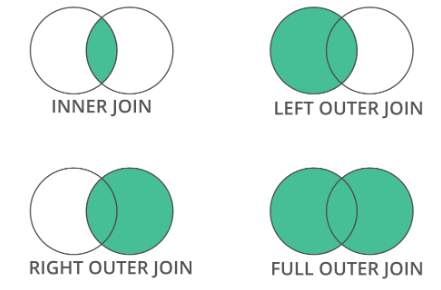

In [29]:
# importing pandas module
import pandas as pd

In [30]:
# Define a dictionary containing employee data
data1 = {'key': ['K0', 'K1', 'K2', 'K3'],
         'Name':['Alice', 'Bob', 'Chris', 'Drake'],
        'Age':[27, 24, 22, 32],}
    
# Define a dictionary containing employee data
data2 = {'key': ['K0', 'K1', 'K2', 'K3'],
         'Address':['London', 'Woking', 'Reading', 'Bracknell'],
        'Degree':['BSc', 'MSci', 'BA', 'BSc']}

# Convert the dictionary into DataFrame 
df = pd.DataFrame(data1)
  
# Convert the dictionary into DataFrame 
df1 = pd.DataFrame(data2)

print("original tables: ")
display(df, df1)


# using .merge() function
table_merge = pd.merge(df, df1, on='key')
table_merge

original tables: 


,key,Name,Age
0,K0,Alice,27
1,K1,Bob,24
2,K2,Chris,22
3,K3,Drake,32


,key,Address,Degree
0,K0,London,BSc
1,K1,Woking,MSci
2,K2,Reading,BA
3,K3,Bracknell,BSc


,key,Name,Age,Address,Degree
0,K0,Alice,27,London,BSc
1,K1,Bob,24,Woking,MSci
2,K2,Chris,22,Reading,BA
3,K3,Drake,32,Bracknell,BSc


## Cleaning Data

### Creating new csv file

Need a new CSV file with some mistakes to work on

### Cleaning empty cells

Empty cells can give wrong results when analysing data

#### Remove Rows


Removing rows with empty cells (NA)

In [31]:
import pandas as pd

df = pd.read_csv("iris_csv.csv")

# dropna() removes all rows with empty cells
# NOTE: this creates a NEW dataframe and
# keeps the original dataframe 'df'
new_df = df.dropna()

display(new_df)


,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [32]:
# dropna() removes all rows with empty cells
# NOTE: 'inplace = True' removes all null vals
# from ORIGINAL dataframe
new_df = df.dropna(inplace = True)

display(new_df)

None

#### Replace Empty Values

In [33]:
import pandas as pd

df = pd.read_csv("iris_csv.csv")

# fillna() replaces null values
# in this eg, NA filled with 130
df.fillna(130, inplace=True)
display(df)

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Replacing only specified columns

In [34]:
# in 'sepallength' column ONLY, fill all nul vals
# with 130
df["sepallength"].fillna(130, inplace=True)

#### Replace Using Mean, Median, or Mode

Using ```mean(), median() and mode()```

Mean

In [35]:
import pandas as pd

df = pd.read_csv('iris_csv.csv')

# calc mean of 'sepallength' column
x = df["sepallength"].mean()
print("mean: ", x)

# fill all null vals in 'sepallength' with 
# calculated mean 
df["sepallength"].fillna(x, inplace = True)

mean:  5.843333333333334


Median

In [36]:
import pandas as pd

df = pd.read_csv('iris_csv.csv')

# calc median of 'sepallength' column
x = df["sepallength"].median()
print("median: ", x)

# fill all null vals in 'sepallength' with 
# calculated median 
df["sepallength"].fillna(x, inplace = True)

median:  5.8


Mode

In [1]:
import pandas as pd

df = pd.read_csv('iris_csv.csv')

# calc mode of 'sepallength' column 
# NOTE: [0] stands for taking first modal 
# value if there are multiple 
# highest mode values
x = df["sepallength"].mode()[0]
print("mode: ", x)

# fill all null vals in 'sepallength' with 
# calculated mode 
df["sepallength"].fillna(x, inplace = True)

mode:  5.0
